In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("ipl_data.csv")

In [3]:
# mid: Unique match id.
# date: Date on which the match was played.
# venue: Stadium where match was played.
# batting_team: Batting team name.
# bowling_team: Bowling team name.
# batsman: Batsman who faced that particular ball.
# bowler: Bowler who bowled that particular ball.
# runs: Runs scored by team till that point of instance.
# wickets: Number of Wickets fallen of the team till that point of instance.
# overs: Number of Overs bowled till that point of instance.
# runs_last_5: Runs scored in previous 5 overs.
# wickets_last_5: Number of Wickets that fell in previous 5 overs.
# striker: max(runs scored by striker, runs scored by non-striker).
# non-striker: min(runs scored by striker, runs scored by non-striker).
# total: Total runs scored by batting team at the end of first innings.first innings.

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [6]:
df.shape

(76014, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
for col in df.columns:
    print(f"{col} - {df[col].value_counts().count()}")

mid - 617
date - 442
venue - 35
bat_team - 14
bowl_team - 14
batsman - 411
bowler - 329
runs - 252
wickets - 11
overs - 140
runs_last_5 - 102
wickets_last_5 - 8
striker - 155
non-striker - 88
total - 138


In [9]:
# dropping mid column i.e match_id
df.drop("mid", axis =1 , inplace = True)

In [10]:
# dropping date column
df.drop("date", axis =1 , inplace = True)

In [11]:
df["batsman"].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'T Kohli',
       'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja',
       'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD Jayawardene',
       'Yuvraj Singh', 'IK Pathan', 'S Sohal', 'B Lee', 'PP Chawla',
       'WA Mota', 'Shahid Afridi', 'RR Sarwan', 'S Sreesanth',
       'VRV Singh', 'S Chanderpaul', 'R Dravid', 'LRPL Taylor',
       'JH Kallis', 'V Kohli', 'MV Boucher', 'P Kumar', 'SB Joshi',
       'Z Khan', 'R Vinay Kumar', 'WP Saha', 'LR Shukla', 'AB Ag

In [12]:
df["bowler"].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'GD McGrath', 'B Geeves',
       'MF Maharoof', 'R Bhatia', 'DL Vettori', 'R Vinay Kumar',
       'B Akhil', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'MM Patel', 'SR Watson',
       'SK Trivedi', 'SK Warne', 'D Salunkhe', 'Pankaj Singh',
       'YK Pathan', 'Mohammad Asif', 'VY Mahesh', 'SM Pollock', 'A Nehra',
       'DS Kulkarni', 'Harbhajan Singh', 'DJ Bravo', 'VS Yeligati',
       'AM Nayar', 'MA Khote', 'Sohail Tanvir', 'JDP Oram', 'MS Gony',
       'P Amarnath', 'M Muralitharan', 'Joginder Sharma', 'RP Singh',
       'DNT Zoysa', 'SB Bangar', 'Shahid Afridi', 'PP Ojha',
       'D Kalyankrishna', 'VRV Singh', 'Yuvraj Singh', 'DW Steyn',
       'CRD Fernando', 'ST Jayasuriya', 'V Kohli', 'Gagandeep Singh',
       'Umar Gul', 'SC Ganguly', 'LR Shukla', 'PJ Sangwan

In [13]:
# columns to convert into numerial variables
# venue
# bat_team  
# bowl_team 
# batsman   
# bowler   

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
venue_encoder = LabelEncoder()
bat_team_encoder = LabelEncoder()
bowl_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

In [16]:
df['venue'] = venue_encoder.fit_transform(df["venue"])
df['bat_team'] = bat_team_encoder.fit_transform(df["bat_team"])
df['bowl_team'] = bowl_team_encoder.fit_transform(df["bowl_team"])
df['batsman'] = batsman_encoder.fit_transform(df["batsman"])
df['bowler'] = bowler_encoder.fit_transform(df["bowler"])

In [17]:
df["bat_team"].unique()

array([ 6,  0,  9,  7,  1,  4, 12,  2,  5,  8, 13, 11,  3, 10])

In [18]:
df.corr()["total"].sort_values()

wickets          -0.337343
wickets_last_5   -0.273475
bowl_team        -0.048799
venue            -0.036385
bowler           -0.011267
batsman           0.017128
overs             0.022282
bat_team          0.031833
runs              0.254498
non-striker       0.293233
runs_last_5       0.368253
striker           0.381664
total             1.000000
Name: total, dtype: float64

<Axes: >

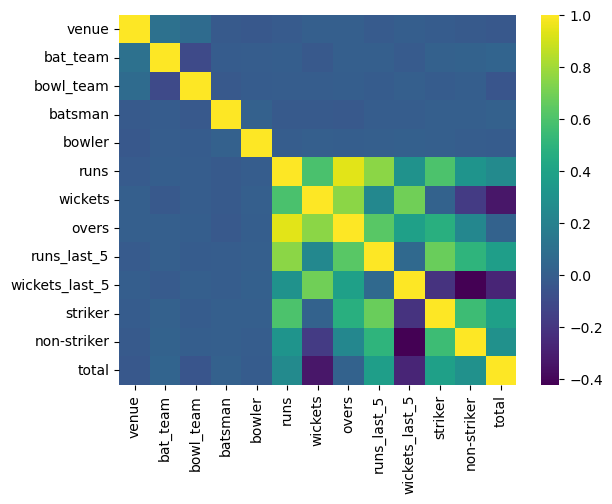

In [19]:
sns.heatmap(df.corr(), cmap="viridis")

<Axes: >

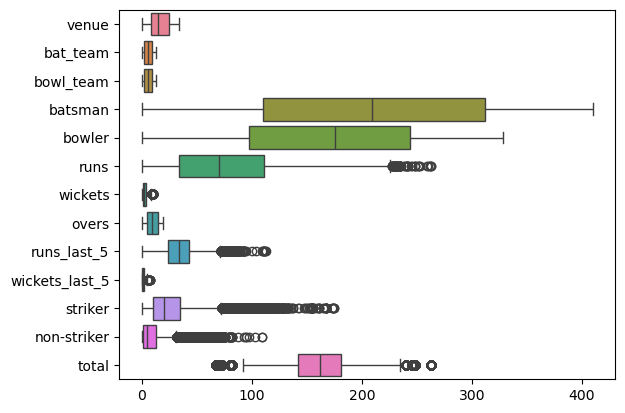

In [20]:
sns.boxplot(data=df, orient="h")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           76014 non-null  int32  
 1   bat_team        76014 non-null  int32  
 2   bowl_team       76014 non-null  int32  
 3   batsman         76014 non-null  int32  
 4   bowler          76014 non-null  int32  
 5   runs            76014 non-null  int64  
 6   wickets         76014 non-null  int64  
 7   overs           76014 non-null  float64
 8   runs_last_5     76014 non-null  int64  
 9   wickets_last_5  76014 non-null  int64  
 10  striker         76014 non-null  int64  
 11  non-striker     76014 non-null  int64  
 12  total           76014 non-null  int64  
dtypes: float64(1), int32(5), int64(7)
memory usage: 6.1 MB


In [22]:
df.describe()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,17.529324,5.932447,6.072224,210.425922,169.802615,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,9.590885,4.132640,3.965610,116.519428,92.909923,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,8.000000,2.000000,2.000000,110.000000,97.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,15.000000,6.000000,6.000000,209.000000,176.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,25.000000,9.000000,9.000000,312.000000,244.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,34.000000,13.000000,13.000000,410.000000,328.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [23]:
X = df.drop("total", axis = 1)
y = df["total"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(50929, 12)

In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

In [30]:
model = Sequential()

model.add(InputLayer(input_shape=(12,)))

model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))


model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam', loss="mean_squared_error")

C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
history = model.fit(x= X_train,
         y = y_train,
         epochs = 100,
         validation_data=[X_test, y_test])

Epoch 1/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 2145.4207 - val_loss: 448.6393
Epoch 2/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 443.0674 - val_loss: 393.9282
Epoch 3/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 433.2911 - val_loss: 398.6543
Epoch 4/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 427.5646 - val_loss: 378.3776
Epoch 5/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 402.1523 - val_loss: 364.2369
Epoch 6/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 400.2750 - val_loss: 362.2903
Epoch 7/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 377.2663 - val_loss: 356.4975
Epoch 8/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 371.9659 - val_loss: 381.2233
Epoch 9/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 367.1614 - val_loss: 367.9897
Epoch 10/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 360.9111 - val_loss: 333.8546
Epoch 11/100
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step -

In [32]:
# Epoch 10/10
# 1592/1592 [==============================] - 10s 6ms/step - loss: 1739.1013 - val_loss: 423.2445

# Epoch 10/10
# 1592/1592 [==============================] - 23s 14ms/step - loss: 1517.8502 - val_loss: 399.8053

# Epoch 17/50
# 1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 331.8851 - val_loss: 319.5752

# Epoch 50/50
# 1592/1592 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 237.6629 - val_loss: 265.5277

# Epoch 100/100
# 1592/1592 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 73.8514 - val_loss: 108.3684


In [33]:
model.evaluate(X_test, y_test)

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 78.4012


78.54524230957031

In [34]:
predictions = model.predict(X_test)

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
predictions[:5]

array([[136.42407],
       [190.64877],
       [176.14677],
       [177.33278],
       [189.15776]], dtype=float32)

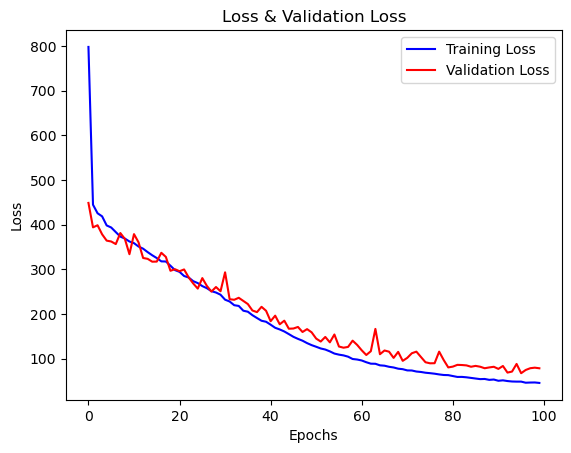

In [39]:
plt.plot(history.history["loss"], label='Training Loss', color='blue')
plt.plot(history.history["val_loss"], label='Validation Loss', color='red')
plt.title("Loss & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [40]:
print(mean_squared_error(y_test, predictions))

78.54524751523134


In [41]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

8.862575670493953


In [42]:
print(r2_score(y_test, predictions))

0.9065557657207253
